In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



from scipy.stats import *
import math
import time

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import OneHotEncoder  # making categorical column in numeric format
from sklearn.preprocessing import MultiLabelBinarizer


from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_validate  # Use cross_validate when you need multiple performance metrics, fit times, and score times.
from sklearn.model_selection import cross_val_score  # Use cross_val_score when you're interested in a single performance metric and want a simple array of scores.

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor  # Use DecisionTreeRegressor for regression tasks where you want to predict continuous numerical values.
from sklearn.tree import DecisionTreeClassifier # Use DecisionTreeClassifier for classification tasks where you want to predict discrete class labels


from sklearn import metrics
from sklearn.metrics import r2_score,precision_score,recall_score,f1_score
from sklearn.metrics import mean_squared_error,roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_excel('default of credit card clients (1).xls' , header = 1)
     

In [9]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [10]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [11]:

df.columns
 

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [13]:
# Rows & Columns count
print('Number of rows :' , df.shape[0] )
print('Number of columns :' , df.shape[1] )

Number of rows : 30000
Number of columns : 25


In [14]:
df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [15]:
#information of datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [16]:
#columns of dataset
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [17]:
#checking 1st Row
df.iloc[0,:]

ID                                1
LIMIT_BAL                     20000
SEX                               2
EDUCATION                         2
MARRIAGE                          1
AGE                              24
PAY_0                             2
PAY_2                             2
PAY_3                            -1
PAY_4                            -1
PAY_5                            -2
PAY_6                            -2
BILL_AMT1                      3913
BILL_AMT2                      3102
BILL_AMT3                       689
BILL_AMT4                         0
BILL_AMT5                         0
BILL_AMT6                         0
PAY_AMT1                          0
PAY_AMT2                        689
PAY_AMT3                          0
PAY_AMT4                          0
PAY_AMT5                          0
PAY_AMT6                          0
default payment next month        1
Name: 0, dtype: int64

In [18]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [19]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

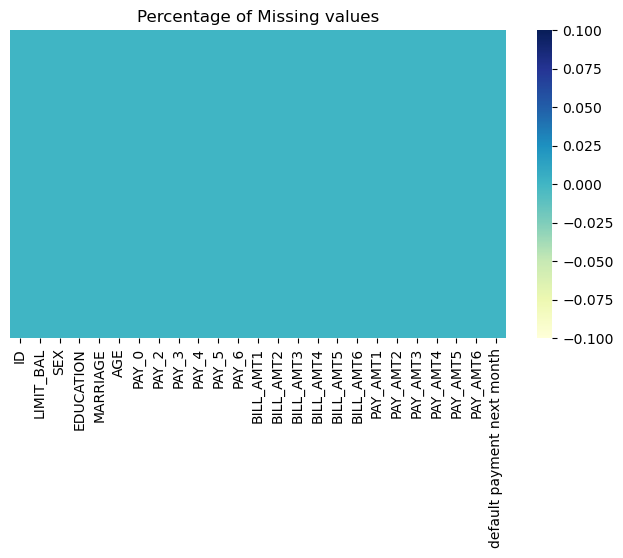

In [20]:
#Plot to check null values
plt.figure(figsize = (8,4))
sns.heatmap(df.isnull() , cbar = True , yticklabels = False,cmap='YlGnBu')
plt.title('Percentage of Missing values')
plt.show()

In [21]:
#checking for any duplicates
len(df[df.duplicated()])

0

In [22]:
# Maximum Limit of bills
df['LIMIT_BAL'].max()

1000000

In [23]:
# Minimum Limit of bills
df['LIMIT_BAL'].min()

10000

In [24]:
#renaming of columns
df.rename(columns = {'default payment next month' : 'IsDefaulter'} , inplace = True)
df.rename(columns = {'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'} , inplace = True)
df.rename(columns = {'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'} , inplace = True)
df.rename(columns = {'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'} , inplace = True)


In [25]:

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [26]:
#creating instance of minmaxscaler
minmax = MinMaxScaler(feature_range = (0,1))
scale_df = minmax.fit_transform(df.drop('IsDefaulter' ,axis = 1))

In [27]:

#imprting IsolationForeest for outlier detection
from sklearn.ensemble import IsolationForest
     

In [28]:

IsolationForest,
#creating instance of isolation forest
clf = IsolationForest(n_estimators = 100,contamination = 0.01,random_state = 0)
clf.fit(scale_df)

IsolationForest(contamination=0.01, random_state=0)

In [29]:
# predict raw anomaly score
df['multivariate_anomaly_score'] = clf.decision_function(scale_df)

# prediction of a datapoint category outlier or inlier

df['multivariate_outlier'] = clf.decision_function(scale_df)
     

In [30]:

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,multivariate_anomaly_score,multivariate_outlier
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,0.179163,0.179163
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,0.203436,0.203436
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0.240266,0.240266
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0.239497,0.239497
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,0.177896,0.177896


In [31]:

#checking dependent valriable
df['IsDefaulter'].value_counts()

IsDefaulter
0    23364
1     6636
Name: count, dtype: int64

Text(0.5, 0, '0=Non defaulter, 1= Defaulter')

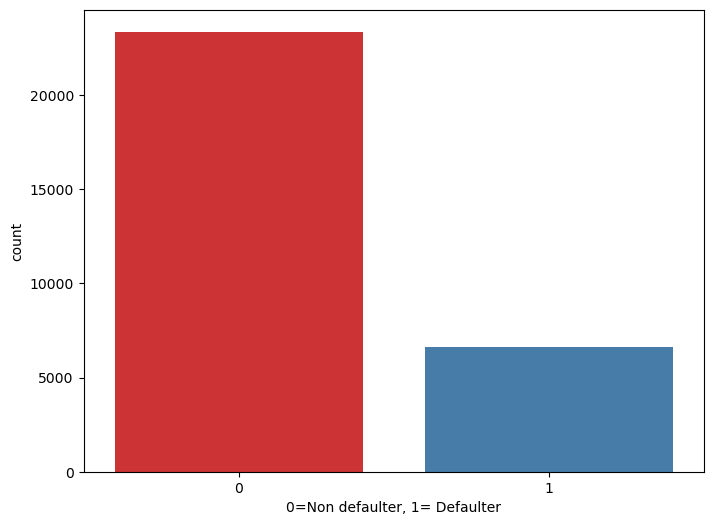

In [32]:
plt.figure(figsize = (8,6))
sns.countplot(x= 'IsDefaulter' , data = df , palette = 'Set1')
plt.xlabel("0=Non defaulter, 1= Defaulter")


In [33]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,multivariate_anomaly_score,multivariate_outlier
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,0.179163,0.179163
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,0.203436,0.203436
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0.240266,0.240266
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0.239497,0.239497
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,0.177896,0.177896


In [34]:

#analysing categorical variable
categorical_features = ['SEX' , 'EDUCATION' , 'MARRIAGE']

In [35]:
#creating different df for categorical variable
df_cat = df[categorical_features]

In [36]:
#looking into categorical df
df_cat.head()

,SEX,EDUCATION,MARRIAGE
0,2,2,1
1,2,2,2
2,2,2,2
3,2,2,1
4,1,2,1


In [37]:
#checking value counts of categorical_features
for column_name in df_cat.columns:
  print(f'count of {column_name} features')
  print(f'\n{df_cat[column_name].value_counts()}\n')

count of SEX features

SEX
2    18112
1    11888
Name: count, dtype: int64

count of EDUCATION features

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

count of MARRIAGE features

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64



In [38]:
#maping numerical value to categorical for easy understanding
df_cat['SEX']=df_cat['SEX'].map({1:'Male',2:'Female'})
df_cat['EDUCATION']=df_cat['EDUCATION'].map({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'other',5:'other',6:'other',0:'other'})
df_cat['MARRIAGE']=df_cat['MARRIAGE'].map({1 : 'married', 2 : 'single', 3 : 'others',0 : 'others'})
     


In [39]:

df_cat.head()

,SEX,EDUCATION,MARRIAGE
0,Female,university,married
1,Female,university,single
2,Female,university,single
3,Female,university,married
4,Male,university,married


AttributeError: 'numpy.int64' object has no attribute 'startswith'

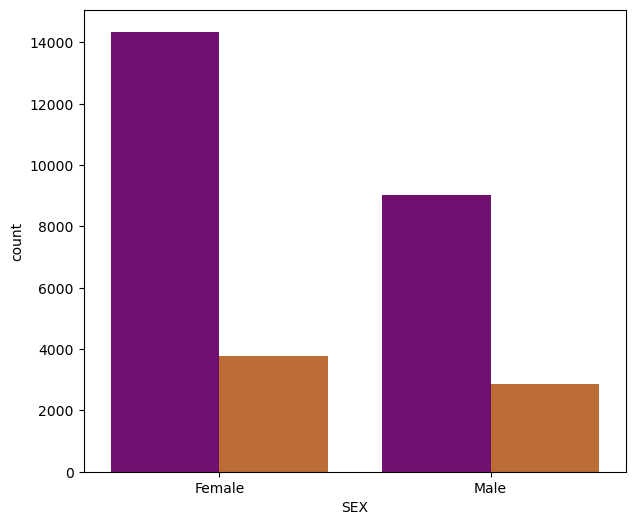

In [40]:
for column_name in df_cat.columns:

  plt.figure(figsize = (7,6))
  sns.countplot(x = column_name , data = df_cat , hue = df['IsDefaulter'] , palette=['purple', 'chocolate'])
  plt.show()
     


In [41]:

#creating defaulter variable on df_cat
df_cat['IsDefaulter'] = df['IsDefaulter']

In [42]:

df_cat.head()

,SEX,EDUCATION,MARRIAGE,IsDefaulter
0,Female,university,married,1
1,Female,university,single,1
2,Female,university,single,0
3,Female,university,married,0
4,Male,university,married,0


In [43]:
#checking the defaulter ratio of categories
for column_name in df_cat.columns[:-1]:
  print(df_cat[['IsDefaulter',column_name]].groupby(column_name).mean().reset_index())

      SEX  IsDefaulter
0  Female     0.207763
1    Male     0.241672
         EDUCATION  IsDefaulter
0  graduate school     0.192348
1      high school     0.251576
2            other     0.070513
3       university     0.237349
  MARRIAGE  IsDefaulter
0  married     0.234717
1   others     0.236074
2   single     0.209283


In [45]:
#desribing age variable
df['AGE'].describe(include='all')

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [46]:
# Count of value in Age column
df['AGE'].value_counts()

AGE
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: count, dtype: int64

In [47]:
# creating function to create the cohort for age group
def age_cohort(age):
  if age in range(21,31) : # starting from 21 because minimum age is 21 in our dataset
    return '21-30'
  elif age in range(31,41) :
    return '31-40'
  elif age in range(41,51) :
    return '41-50'
  elif age in range(51,61) :
    return '51-60'
  else:
    return '60 & above'
     

df['age_group'] = df['AGE'].apply(lambda x: age_cohort(x))
     

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,multivariate_anomaly_score,multivariate_outlier,age_group
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,0.179163,0.179163,21-30
1,2,120000,2,2,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,0.203436,0.203436,21-30
2,3,90000,2,2,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,0.240266,0.240266,31-40
3,4,50000,2,2,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,0.239497,0.239497,31-40
4,5,50000,1,2,1,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,0.177896,0.177896,51-60


In [48]:
#cheacking the count of age_group
df['age_group'].value_counts().sort_values(ascending = False)
     

age_group
21-30         11013
31-40         10713
41-50          6005
51-60          1997
60 & above      272
Name: count, dtype: int64

AttributeError: 'numpy.int64' object has no attribute 'startswith'

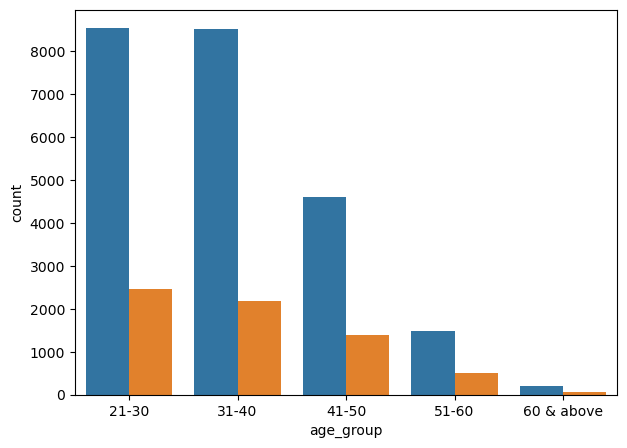

In [49]:
#visualizing age group
plt.figure(figsize = (7,5))
sns.countplot(x = df['age_group'].sort_values() , data = df , hue = 'IsDefaulter' )
     

In [50]:

#checking the dedfault ratio of age_group
df[['IsDefaulter','age_group']].groupby('age_group').mean().reset_index()

,age_group,IsDefaulter
0,21-30,0.224371
1,31-40,0.204331
2,41-50,0.232973
3,51-60,0.252379
4,60 & above,0.268382


<Axes: xlabel='AGE', ylabel='count'>

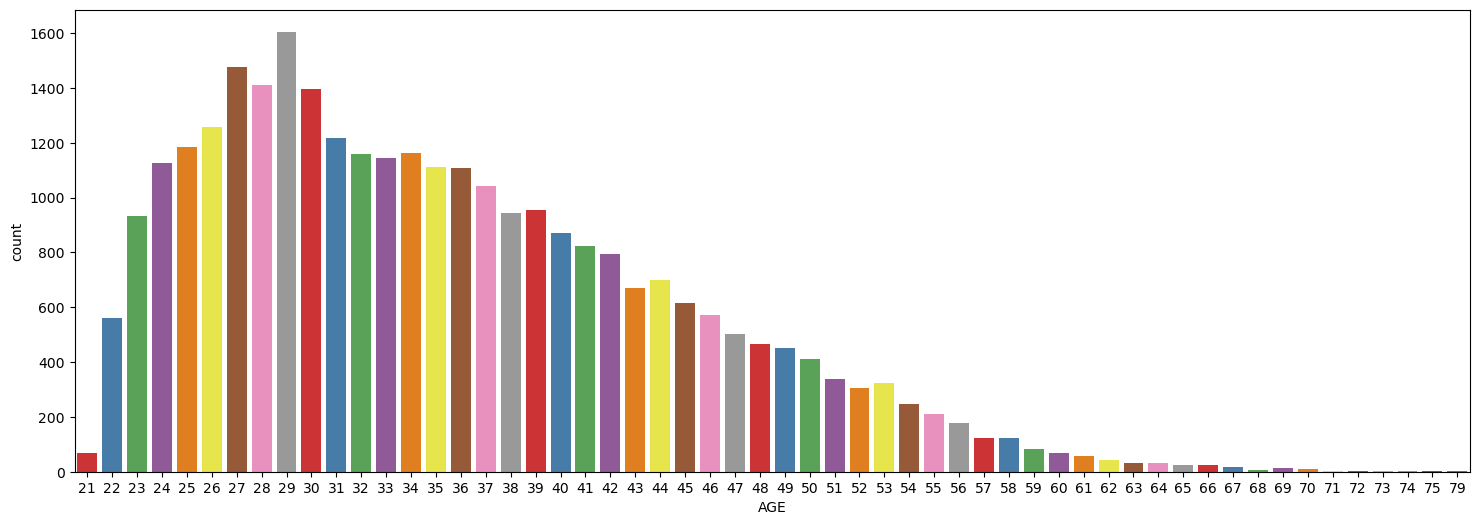

In [51]:

# Ploting the individual count of age
plt.figure(figsize = (18,6))
sns.countplot(x = df['AGE'].sort_values(ascending = False) , data = df , palette = 'Set1')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

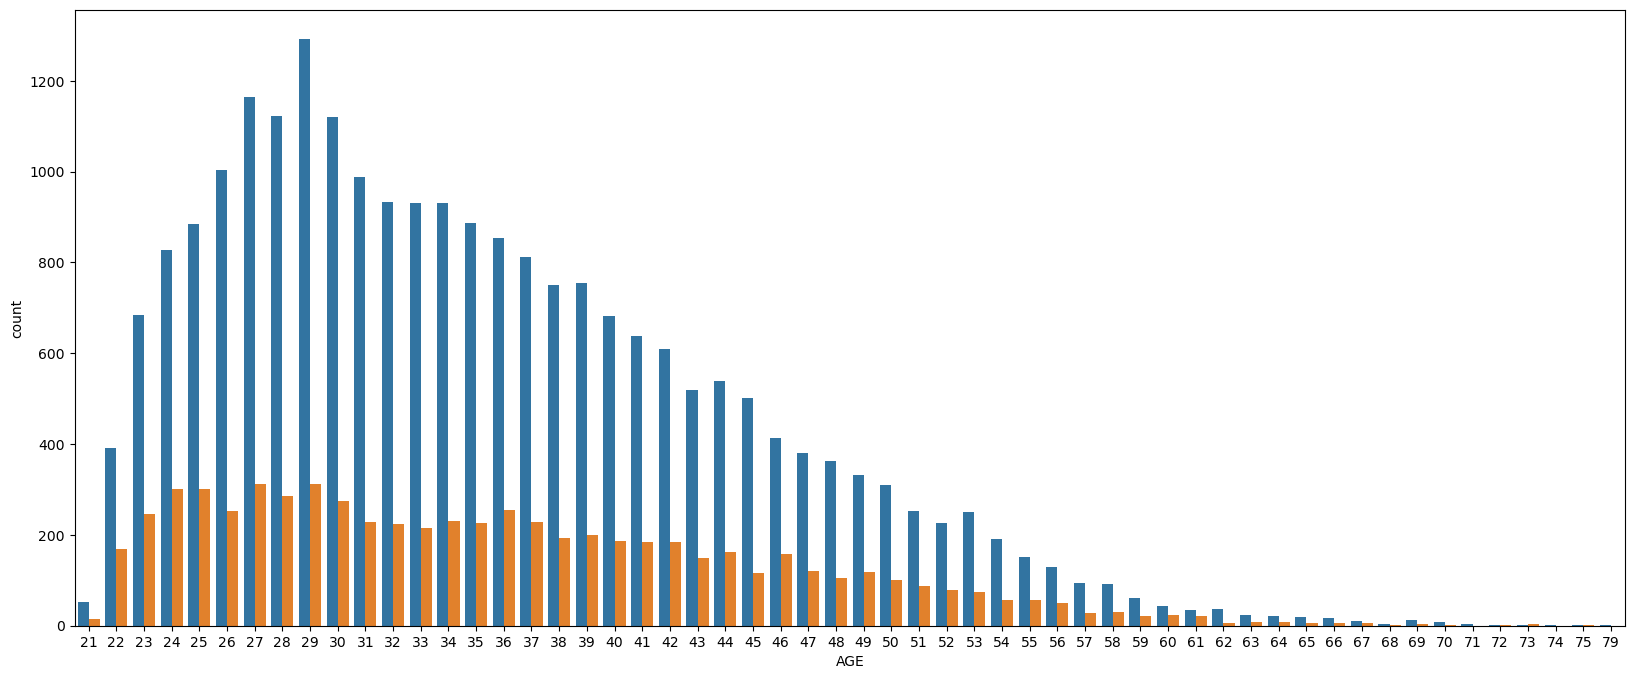

In [52]:

#plotting values count for Age with respect to IsDefaulter
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', hue = 'IsDefaulter', data = df)

In [53]:
# Drop age column because we have age_group column in
df = df.drop('AGE',axis= 1)
     

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,multivariate_anomaly_score,multivariate_outlier,age_group
0,1,20000,2,2,1,2,2,-1,-1,-2,...,0,689,0,0,0,0,1,0.179163,0.179163,21-30
1,2,120000,2,2,2,-1,2,0,0,0,...,0,1000,1000,1000,0,2000,1,0.203436,0.203436,21-30
2,3,90000,2,2,2,0,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,0.240266,0.240266,31-40
3,4,50000,2,2,1,0,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,0.239497,0.239497,31-40
4,5,50000,1,2,1,-1,0,-1,0,0,...,2000,36681,10000,9000,689,679,0,0.177896,0.177896,51-60


In [54]:

# Payment delay description

df[['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']].describe()

,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [55]:

#Previous Payment Description
df[['PAY_AMT_SEPT','PAY_AMT_AUG','PAY_AMT_JUL','PAY_AMT_JUN','PAY_AMT_MAY','PAY_AMT_APR']].describe()

,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [56]:

# Bill Statement description
df[['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR']].describe()

,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


<Axes: xlabel='IsDefaulter', ylabel='LIMIT_BAL'>

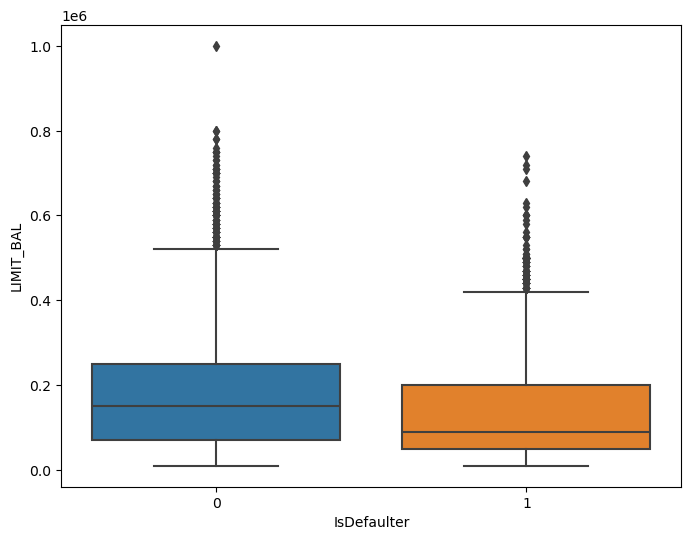

In [57]:

plt.figure(figsize = (8,6))
sns.boxplot(x  = 'IsDefaulter' , y = "LIMIT_BAL" , data=df)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

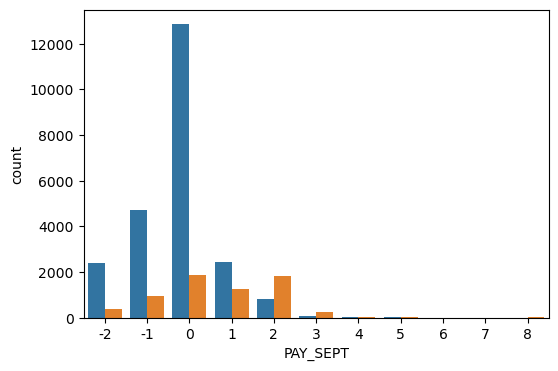

In [58]:
pay_col = ['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']
for col in pay_col:
  plt.figure(figsize = (6,4,))
  sns.countplot(x = col , hue = 'IsDefaulter' , data = df)
     

In [59]:

# checking info of our data
df.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  int64  
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   PAY_SEPT                    30000 non-null  int64  
 6   PAY_AUG                     30000 non-null  int64  
 7   PAY_JUL                     30000 non-null  int64  
 8   PAY_JUN                     30000 non-null  int64  
 9   PAY_MAY                     30000 non-null  int64  
 10  PAY_APR                     30000 non-null  int64  
 11  BILL_AMT_SEPT               30000 non-null  int64  
 12  BILL_AMT_AUG                30000 non-null  int64  
 13  BILL_AMT_JUL                300

<Axes: xlabel='age_group', ylabel='IsDefaulter'>

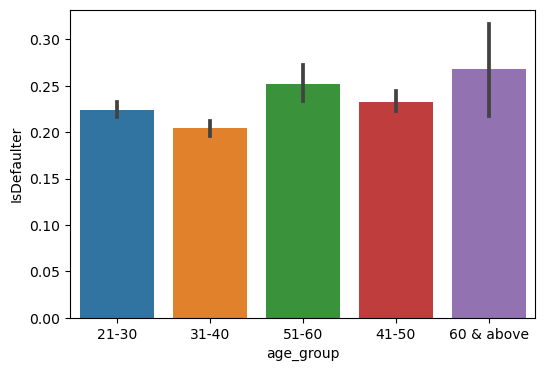

In [60]:
plt.figure(figsize = (6,4))
sns.barplot(x = 'age_group' , y = 'IsDefaulter' , data = df)

<Figure size 1800x1000 with 0 Axes>

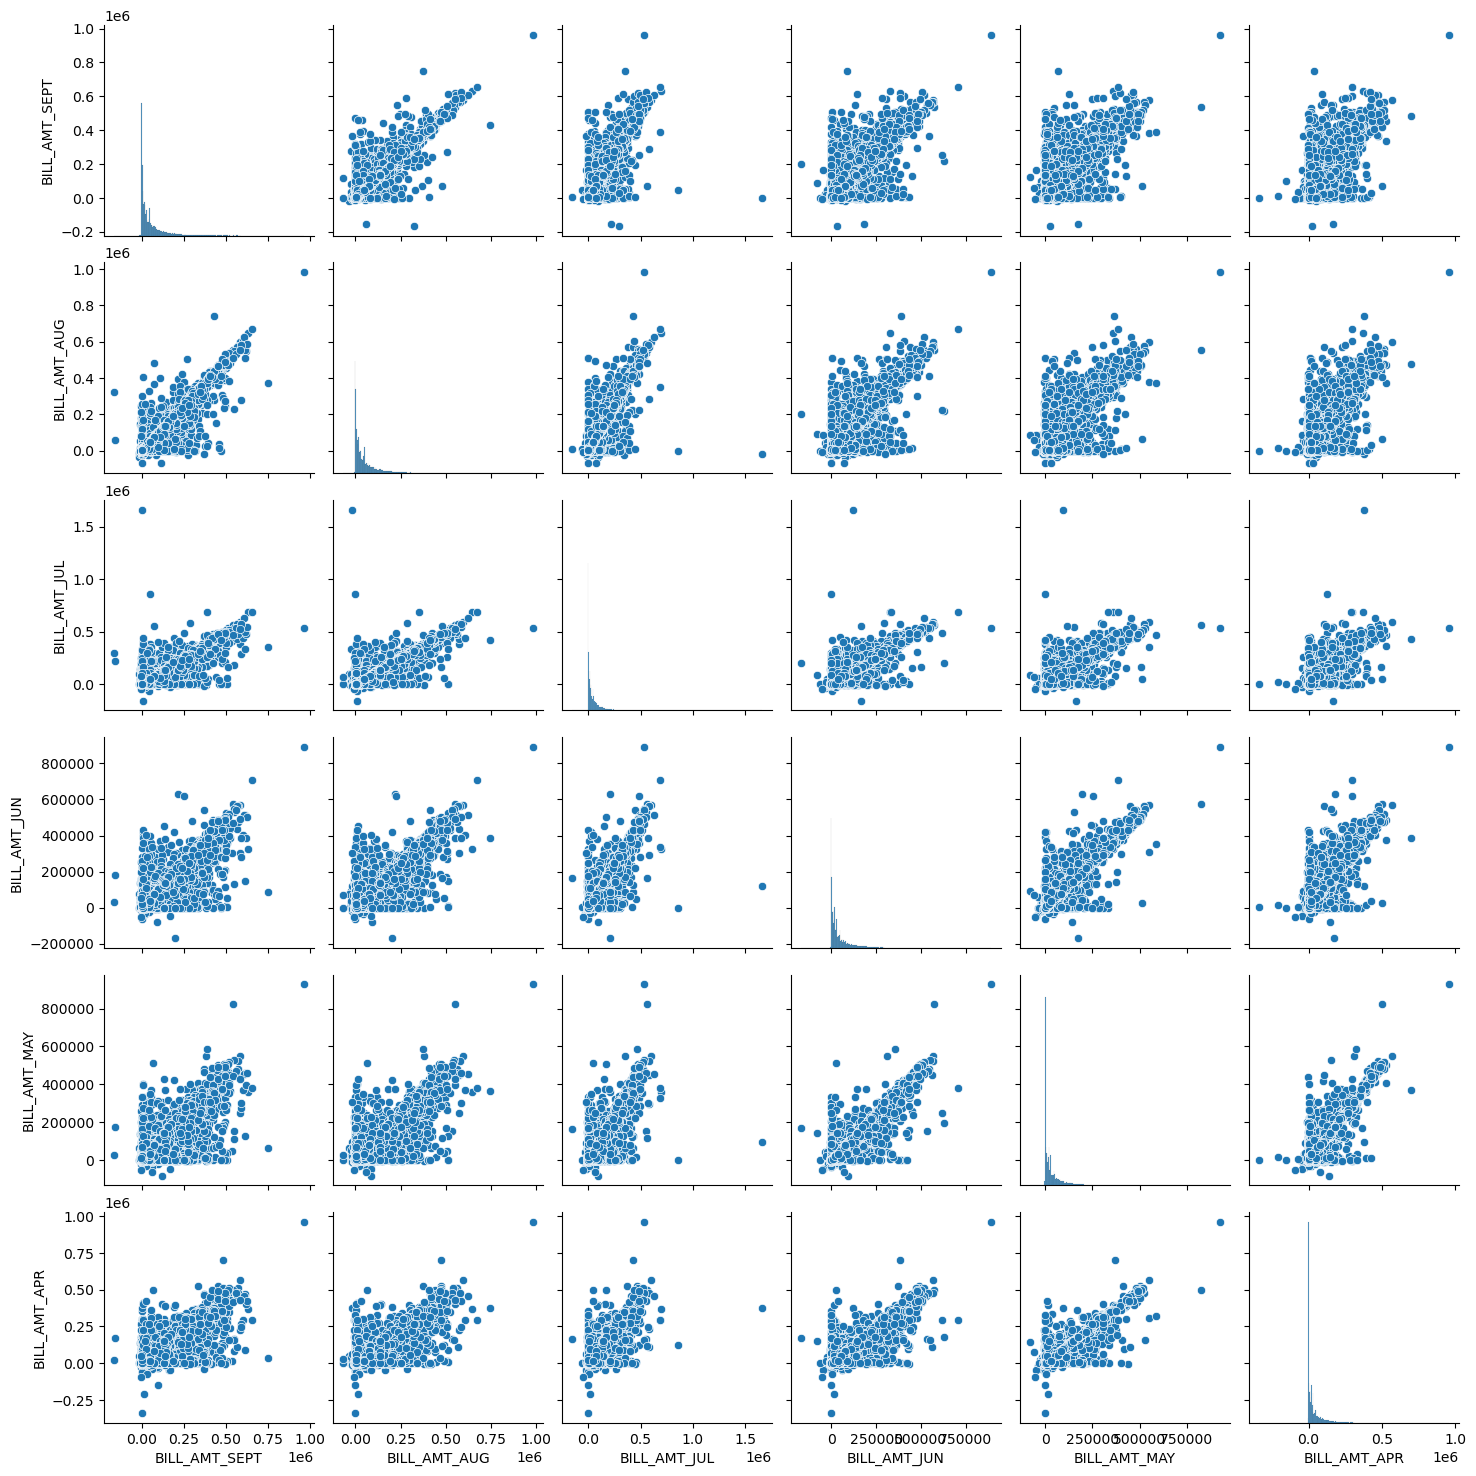

In [61]:
bill_amnt_df = df[['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR']]
plt.figure(figsize = (18,10)),
sns.pairplot(data = bill_amnt_df)
     

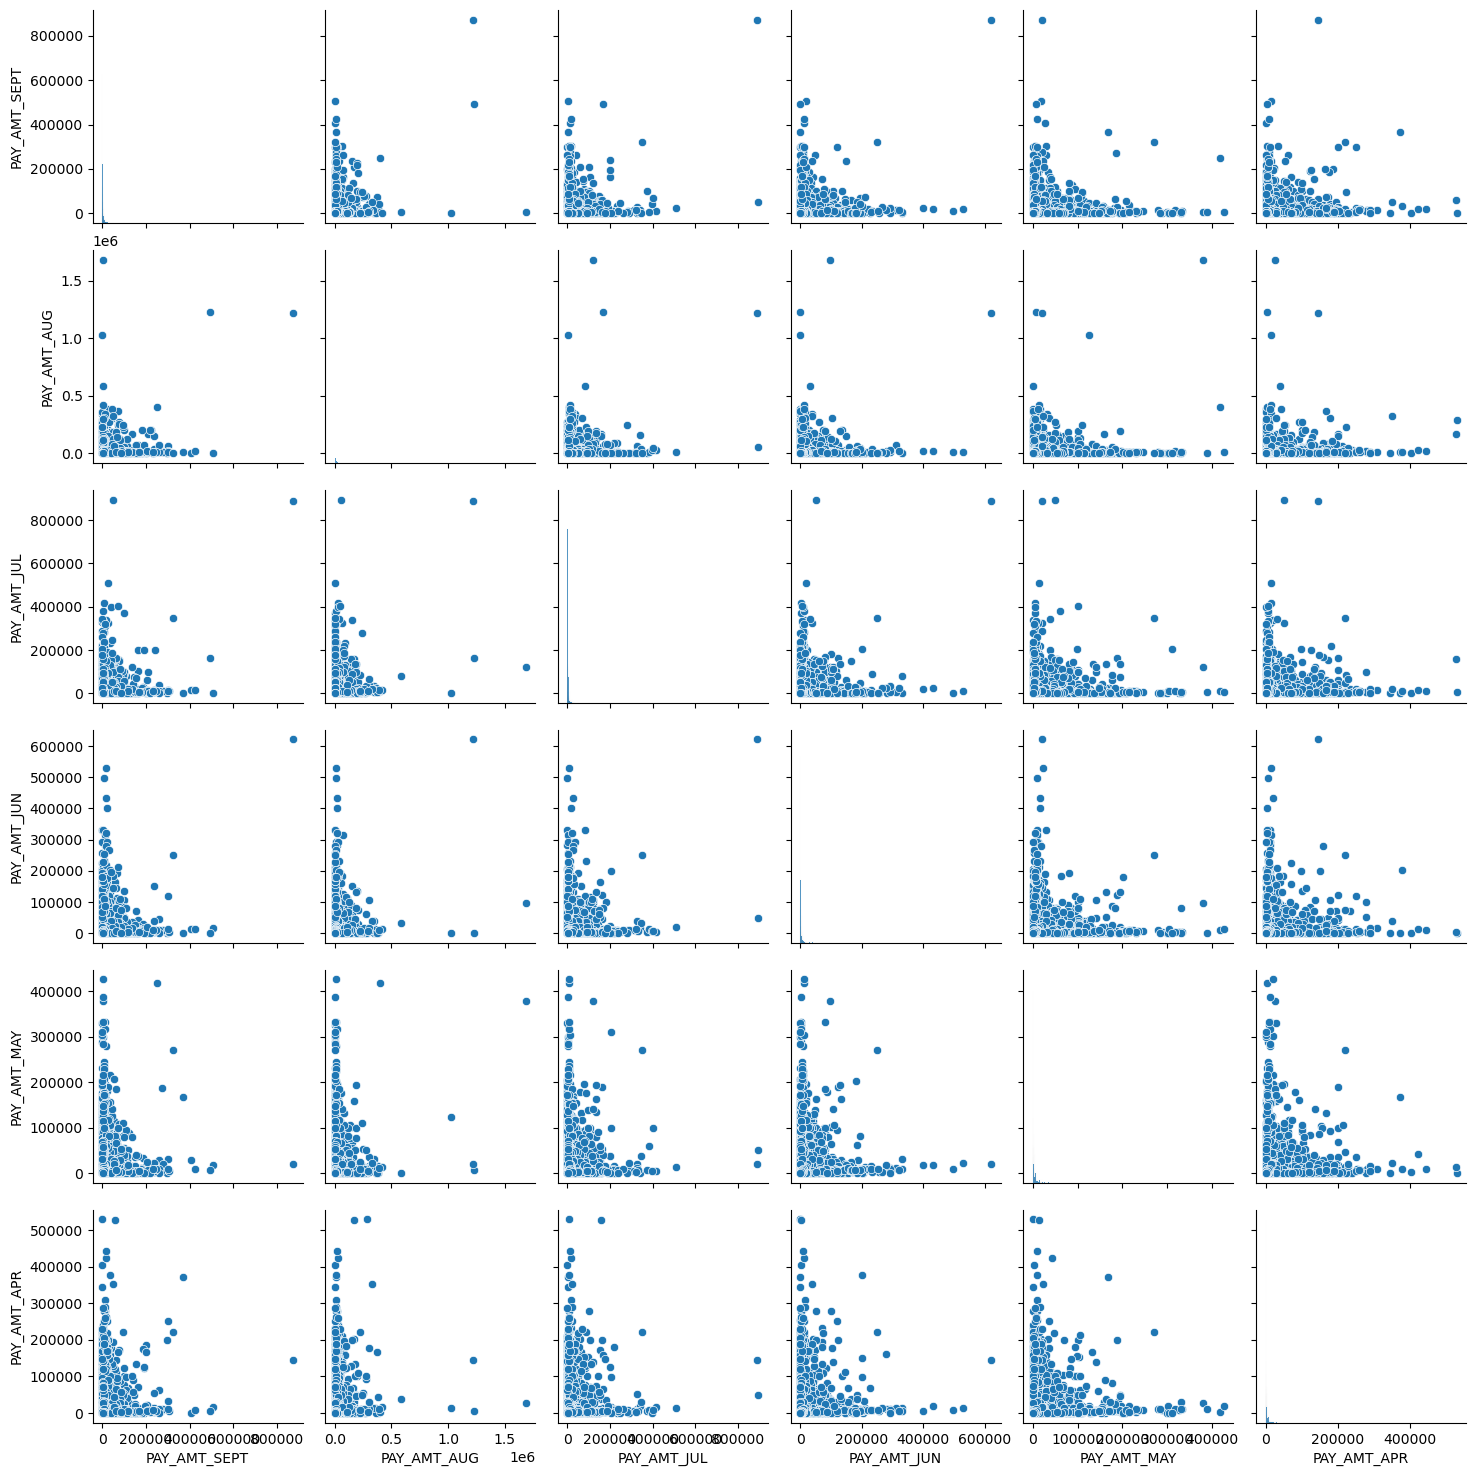

In [62]:
pay_amnt_df = df[['PAY_AMT_SEPT',	'PAY_AMT_AUG',	'PAY_AMT_JUL',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APR']]
     

sns.pairplot(data = pay_amnt_df)
     

In [64]:
#spliting independent Variable
x = df.drop(['IsDefaulter','multivariate_anomaly_score','multivariate_outlier'] , axis = 1)
     

#looking into independent variable
x.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,age_group
0,1,20000,2,2,1,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,21-30
1,2,120000,2,2,2,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,21-30
2,3,90000,2,2,2,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,31-40
3,4,50000,2,2,1,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,31-40
4,5,50000,1,2,1,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,51-60


In [65]:
x.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,age_group
0,1,20000,2,2,1,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,21-30
1,2,120000,2,2,2,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,21-30
2,3,90000,2,2,2,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,31-40
3,4,50000,2,2,1,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,31-40
4,5,50000,1,2,1,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,51-60


In [66]:
# one hot encoding for age group
x = pd.get_dummies(x)
     

x.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,age_group_21-30,age_group_31-40,age_group_41-50,age_group_51-60,age_group_60 & above
0,1,20000,2,2,1,2,2,-1,-1,-2,...,689,0,0,0,0,True,False,False,False,False
1,2,120000,2,2,2,-1,2,0,0,0,...,1000,1000,1000,0,2000,True,False,False,False,False
2,3,90000,2,2,2,0,0,0,0,0,...,1500,1000,1000,1000,5000,False,True,False,False,False
3,4,50000,2,2,1,0,0,0,0,0,...,2019,1200,1100,1069,1000,False,True,False,False,False
4,5,50000,1,2,1,-1,0,-1,0,0,...,36681,10000,9000,689,679,False,False,False,True,False


In [67]:
#spliting Dependent variable
y = df['IsDefaulter']
     

df_final = x.copy()
df_final.head()
     

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,age_group_21-30,age_group_31-40,age_group_41-50,age_group_51-60,age_group_60 & above
0,1,20000,2,2,1,2,2,-1,-1,-2,...,689,0,0,0,0,True,False,False,False,False
1,2,120000,2,2,2,-1,2,0,0,0,...,1000,1000,1000,0,2000,True,False,False,False,False
2,3,90000,2,2,2,0,0,0,0,0,...,1500,1000,1000,1000,5000,False,True,False,False,False
3,4,50000,2,2,1,0,0,0,0,0,...,2019,1200,1100,1069,1000,False,True,False,False,False
4,5,50000,1,2,1,-1,0,-1,0,0,...,36681,10000,9000,689,679,False,False,False,True,False


In [68]:
df_final['IsDefaulter'] = df['IsDefaulter']
     

df_final

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,age_group_21-30,age_group_31-40,age_group_41-50,age_group_51-60,age_group_60 & above,IsDefaulter
0,1,20000,2,2,1,2,2,-1,-1,-2,...,0,0,0,0,True,False,False,False,False,1
1,2,120000,2,2,2,-1,2,0,0,0,...,1000,1000,0,2000,True,False,False,False,False,1
2,3,90000,2,2,2,0,0,0,0,0,...,1000,1000,1000,5000,False,True,False,False,False,0
3,4,50000,2,2,1,0,0,0,0,0,...,1200,1100,1069,1000,False,True,False,False,False,0
4,5,50000,1,2,1,-1,0,-1,0,0,...,10000,9000,689,679,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,0,0,0,0,0,...,5003,3047,5000,1000,False,True,False,False,False,0
29996,29997,150000,1,3,2,-1,-1,-1,-1,0,...,8998,129,0,0,False,False,True,False,False,0
29997,29998,30000,1,2,2,4,3,2,-1,0,...,22000,4200,2000,3100,False,True,False,False,False,1
29998,29999,80000,1,3,1,1,-1,0,0,0,...,1178,1926,52964,1804,False,False,True,False,False,1


In [69]:
#importing SMote to make our dataset balanced
from imblearn.over_sampling import SMOTE
smote  = SMOTE()

# fit predictor and target variable
x_smote,y_smote = smote.fit_resample(x,y)


print('Original Dataset shape:' ,len(df))
print('Resample Dataset shape:' ,len(y_smote))

Original Dataset shape: 30000
Resample Dataset shape: 46728


In [70]:
#now checking the count of dependent variaable after balancing
(unique,counts) = np.unique(y_smote , return_counts = True)
np.asarray((unique,counts)).T

array([[    0, 23364],
       [    1, 23364]], dtype=int64)

In [71]:
y_smote.value_counts()
     

IsDefaulter
1    23364
0    23364
Name: count, dtype: int64

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size = 0.25 , random_state = 101)
     

#looking into shape  of train & test dataset

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
     

(35046, 28)
(35046,)
(11682, 28)
(11682,)


In [73]:
#Scaling Feature
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test  = scaler.fit_transform(x_test)
     

In [74]:
model_accuracy = []
model_precision = []
model_recall =    []
model_f1_score = []
model_roc_auc_score = []
     

# Creating Function to run diferent models

def run_evaluate_model(model,x_train,x_test,y_train,y_test,best_parameter=True, best_score =True ):

  '''
  train our model and gives mse,rmse,r2,adj r2 score of the model
  can be used for any model where y is not transformed
  '''

  start = time.time()
  # train our model
  model.fit(x_train,y_train)
  stop = time.time()



  #predicting the values of y from x via model
  y_pred_test = model.predict(x_test)
  y_pred_train = model.predict(x_train)


  # Get the confusion matrix for both train and test
  from sklearn.metrics import confusion_matrix,classification_report


  def score(model,x,actual,predicted,append = True):
    accuracy = accuracy_score(actual,predicted)
    precision = precision_score(actual,predicted)
    recall = recall_score(actual,predicted)
    f1 = f1_score(actual,predicted)
    roc = roc_auc_score(actual,predicted)
    confusion_mat = confusion_matrix(actual,predicted)
    print("The accuracy is ", accuracy)
    print("The precision is ", precision)
    print("The recall is ", recall)
    print("The f1 is ", f1)
    print('the auc  is ',roc)
    print('\nconfusion_matrix \n' ,confusion_mat)


    if append == True:

      model_accuracy.append(accuracy)
      model_precision.append(precision)
      model_recall.append(recall)
      model_f1_score.append(f1)
      model_roc_auc_score.append(roc)
    else:
      pass

  print('score matrix for train')
  print('*'*80)
  score(model=model,x=x_train,actual=y_train,predicted=y_pred_train,append=False)
  print('\nClassification Report\n')
  print(classification_report(y_train, y_pred_train))
  print('\n')
  print('score matrix for test')
  print('*'*80)
  score(model=model,x=x_test,actual=y_test,predicted=y_pred_test)
  print('\nClassification Report\n')
  print(classification_report(y_test, y_pred_test))



     

In [76]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


In [77]:
#  importing lime
import lime
import lime.lime_tabular
     

# LIME SECTION

def LimeTabularExplainer_table(model,instance,num_features,dependent_var):
  # creating a data frame to store all the independent features
  x = df_final.drop(dependent_var,axis= 1)
  # fetching all the features name from independent variable
  feature_names = list(x.columns)

  # setting up the lime tablular
  explainer = lime.lime_tabular.LimeTabularExplainer(x.values,feature_names=feature_names , mode = 'classification')

  # selecting the instace to explain
  choosen_instance = x.reset_index(drop = True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance, model.predict.proba , num_features = num_features)

  # showing the lime graph on the screen
  exp.show_in_notebook(show_table = True)

In [78]:
#creating function to get features importance of all the tree based model

def get_features_importance(optimal_model , x_train):
  imp_feat = pd.DataFrame(index = x.columns , data = optimal_model.feature_importances_, columns = ['importance'])
  imp_feat = imp_feat[imp_feat['importance']>0]
  imp_feat = imp_feat.sort_values('importance')
  plt.figure(figsize = (15,5))
  print(f'==========================Features Importance============================\n\n {optimal_model}\
  \n=========================================================================\n')
  sns.barplot(data = imp_feat , x =imp_feat.index , y = 'importance')
  plt.xticks(rotation = 90);

In [79]:
# import Loggistic Regression
from sklearn.linear_model import LogisticRegression
     

#creating Instance of Logistic Regression
log_model = LogisticRegression()

     

#running and evaluating log_model using function ccreated

run_evaluate_model(log_model , scaled_x_train,scaled_x_test,y_train,y_test )
     

score matrix for train
********************************************************************************
The accuracy is  0.810477657935285
The precision is  0.8856635911994323
The recall is  0.7126784694460309
The f1 is  0.7898101265822786
the auc  is  0.8104051562558621

confusion_matrix 
 [[15925  1611]
 [ 5031 12479]]

Classification Report

              precision    recall  f1-score   support

           0       0.76      0.91      0.83     17536
           1       0.89      0.71      0.79     17510

    accuracy                           0.81     35046
   macro avg       0.82      0.81      0.81     35046
weighted avg       0.82      0.81      0.81     35046



score matrix for test
********************************************************************************
The accuracy is  0.8139017291559665
The precision is  0.8940042826552462
The recall is  0.7131875640587633
The f1 is  0.7934245534017484
the auc  is  0.8141263832647968

confusion_matrix 
 [[5333  495]
 [1679 4175]]

Clas

In [80]:
# creating param dict for hyperparameter tuning
param_dict = {'C':  [0.001,0.01,0.1,1,10,100] , 'penalty': ['l1' , 'l2'], 'max_iter':[1000]}
     

#creating Grid model to perform grid search
grid_log_model = GridSearchCV(log_model, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall')
     

#running and evaluating grid_log_model using function ccreated
run_evaluate_model(grid_log_model ,scaled_x_train,scaled_x_test,y_train,y_test)
     

Fitting 5 folds for each of 12 candidates, totalling 60 fits
score matrix for train
********************************************************************************
The accuracy is  0.8062261028362723
The precision is  0.8540194200409539
The recall is  0.7383780696744717
The f1 is  0.7919997549695243
the auc  is  0.8061758049102286

confusion_matrix 
 [[15326  2210]
 [ 4581 12929]]

Classification Report

              precision    recall  f1-score   support

           0       0.77      0.87      0.82     17536
           1       0.85      0.74      0.79     17510

    accuracy                           0.81     35046
   macro avg       0.81      0.81      0.81     35046
weighted avg       0.81      0.81      0.81     35046



score matrix for test
********************************************************************************
The accuracy is  0.810220852593734
The precision is  0.8614589544822103
The recall is  0.7403484796720191
The f1 is  0.79632521819017
the auc  is  0.8103767106

In [81]:

#getting the coeficient of best estimator
grid_log_model.best_estimator_.coef_
     

array([[-0.02114048, -0.12127298, -0.26388375, -0.25420652, -0.32494462,
         0.4565865 ,  0.12729558,  0.05950268,  0.04349338,  0.05597482,
         0.03434878, -0.1035882 , -0.01199258,  0.00546388,  0.01146883,
         0.01029745,  0.01608402, -0.134164  , -0.14047747, -0.06753976,
        -0.07554588, -0.06255013, -0.04936124, -0.81402603, -0.86421483,
        -0.716102  , -0.44153289, -0.17083404]])

In [82]:
optimal_log_model = grid_log_model.best_estimator_.coef_
     

#ccreating dataframe for feature imp
feature_importance = pd.DataFrame({'Features' : x.columns , 'Importance' : np.abs(optimal_log_model).ravel()})

     

#sorting the feat impt df by importance
imp_feat = feature_importance.sort_values(by = 'Importance' , ascending  = False)[:10]
     

imp_feat
     


,Features,Importance
24,age_group_31-40,0.864215
23,age_group_21-30,0.814026
25,age_group_41-50,0.716102
5,PAY_SEPT,0.456586
26,age_group_51-60,0.441533
4,MARRIAGE,0.324945
2,SEX,0.263884
3,EDUCATION,0.254207
27,age_group_60 & above,0.170834
18,PAY_AMT_AUG,0.140477


==================================Feature Importance=======================

[[-0.02114048 -0.12127298 -0.26388375 -0.25420652 -0.32494462  0.4565865
   0.12729558  0.05950268  0.04349338  0.05597482  0.03434878 -0.1035882
  -0.01199258  0.00546388  0.01146883  0.01029745  0.01608402 -0.134164
  -0.14047747 -0.06753976 -0.07554588 -0.06255013 -0.04936124 -0.81402603
  -0.86421483 -0.716102   -0.44153289 -0.17083404]]



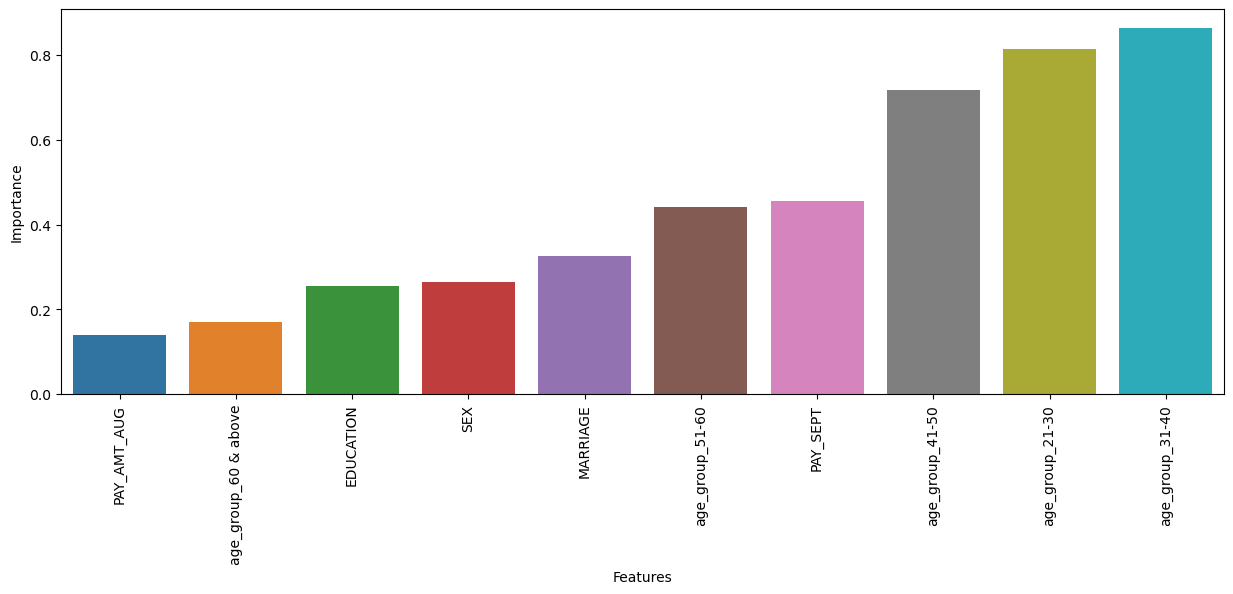

In [83]:
#visualizing the feature importance
imp_feat = imp_feat[imp_feat['Importance']>0]
imp_feat = imp_feat.sort_values('Importance')
plt.figure(figsize = (15,5))
print(f'==================================Feature Importance=======================\n\n{optimal_log_model}\
\n===========================================================================\n')
sns.barplot(data = imp_feat , x = imp_feat.Features , y  = 'Importance')
plt.xticks(rotation = 90);


In [84]:

#geting the best Paramater of model
grid_log_model.best_params_

{'C': 0.001, 'max_iter': 1000, 'penalty': 'l2'}

In [85]:
#impoting decisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# creating DecisionTree model
DecisionTree = DecisionTreeClassifier(max_depth=10,max_leaf_nodes = 45 , criterion = 'entropy')
# training and evaluating the DecisionTree
run_evaluate_model(DecisionTree,scaled_x_train,scaled_x_test,y_train,y_test)
     

score matrix for train
********************************************************************************
The accuracy is  0.8064829081778234
The precision is  0.8617480442406258
The recall is  0.7297544260422616
The f1 is  0.7902776918795226
the auc  is  0.806426026889744

confusion_matrix 
 [[15486  2050]
 [ 4732 12778]]

Classification Report

              precision    recall  f1-score   support

           0       0.77      0.88      0.82     17536
           1       0.86      0.73      0.79     17510

    accuracy                           0.81     35046
   macro avg       0.81      0.81      0.81     35046
weighted avg       0.81      0.81      0.81     35046



score matrix for test
********************************************************************************
The accuracy is  0.8088512241054614
The precision is  0.8713846153846154
The recall is  0.7256576699692517
The f1 is  0.79187249510672
the auc  is  0.8090367965494851

confusion_matrix 
 [[5201  627]
 [1606 4248]]

Classi

In [86]:

DecisionTree.feature_importances_

array([0.        , 0.        , 0.06654891, 0.        , 0.05213809,
       0.05964142, 0.30523931, 0.        , 0.        , 0.01093798,
       0.02422385, 0.        , 0.00318542, 0.        , 0.        ,
       0.        , 0.        , 0.00671999, 0.01354435, 0.02119031,
       0.        , 0.        , 0.        , 0.06535127, 0.09934523,
       0.09834284, 0.12665457, 0.04693646])

==========================Features Importance============================

 DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=45)  



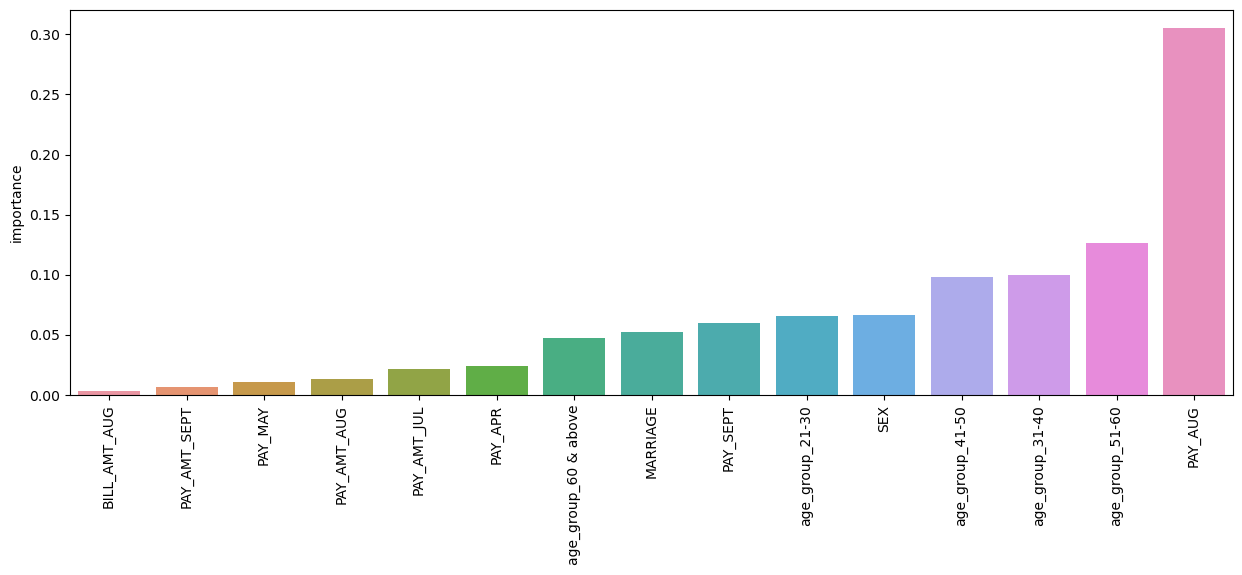

In [87]:
get_features_importance(DecisionTree,x_train)